本脚本联系使用blob检测图像的特定连续区域

值得注意的是，blob无法输出非圆形目标的轮廓，只能输出其外接圆或外接矩形

In [6]:
# 导入阅读代码工具
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

In [3]:
import cv2
import numpy as np

In [3]:
image_path='/home/wushaogui/ReadCode/OpenCV-Python-Tutorial/ch25-斑点检测/blob.jpg'

(480, 480, 3)


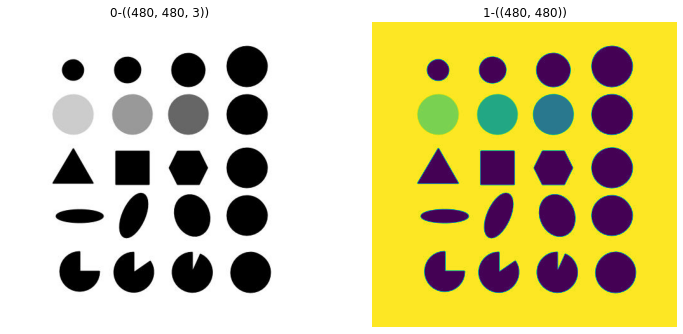

In [6]:
image=cv2.imread(image_path)
print(image.shape)

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show_images([image,gray],imsize=6)

# 定义blob检测参数

In [12]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
print(params,dir(params))

<SimpleBlobDetector_Params 0x7fccac4c84b0> ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'blobColor', 'filterByArea', 'filterByCircularity', 'filterByColor', 'filterByConvexity', 'filterByInertia', 'maxArea', 'maxCircularity', 'maxConvexity', 'maxInertiaRatio', 'maxThreshold', 'minArea', 'minCircularity', 'minConvexity', 'minDistBetweenBlobs', 'minInertiaRatio', 'minRepeatability', 'minThreshold', 'thresholdStep']


In [17]:
# 查看默认参数
for att in dir(params):
    if '__' not in att:
        print(F'{att}:{params.__getattribute__(att)}')

blobColor:0
filterByArea:True
filterByCircularity:False
filterByColor:True
filterByConvexity:True
filterByInertia:True
maxArea:5000.0
maxCircularity:3.4028234663852886e+38
maxConvexity:3.4028234663852886e+38
maxInertiaRatio:3.4028234663852886e+38
maxThreshold:220.0
minArea:25.0
minCircularity:0.800000011920929
minConvexity:0.949999988079071
minDistBetweenBlobs:10.0
minInertiaRatio:0.10000000149011612
minRepeatability:2
minThreshold:50.0
thresholdStep:10.0


In [18]:
# Change thresholds 设置灰度值阈值
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area. 设置面积阈值
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity 设置圆度
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity 设置凸性
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia 设置
params.filterByInertia = True
params.minInertiaRatio = 0.01

In [21]:
# 查看参数变化
params_tmp = cv2.SimpleBlobDetector_Params()
for att in dir(params):
    if '__' not in att:
        print(F'{att}:{params_tmp.__getattribute__(att)}  -->  {params.__getattribute__(att)}')

blobColor:0  -->  0
filterByArea:True  -->  True
filterByCircularity:False  -->  True
filterByColor:True  -->  True
filterByConvexity:True  -->  True
filterByInertia:True  -->  True
maxArea:5000.0  -->  5000.0
maxCircularity:3.4028234663852886e+38  -->  3.4028234663852886e+38
maxConvexity:3.4028234663852886e+38  -->  3.4028234663852886e+38
maxInertiaRatio:3.4028234663852886e+38  -->  3.4028234663852886e+38
maxThreshold:220.0  -->  200.0
minArea:25.0  -->  1500.0
minCircularity:0.800000011920929  -->  0.10000000149011612
minConvexity:0.949999988079071  -->  0.8700000047683716
minDistBetweenBlobs:10.0  -->  10.0
minInertiaRatio:0.10000000149011612  -->  0.009999999776482582
minRepeatability:2  -->  2
minThreshold:50.0  -->  10.0
thresholdStep:10.0  -->  10.0


# blob检测

In [ ]:
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3:
    detector = cv2.SimpleBlobDetector(params)
else:
    # Set up the detector with default parameters.
    detector = cv2.SimpleBlobDetector_create(params)

In [11]:
# Detect blobs.
keypoints = detector.detect(image)
print(keypoints,dir(keypoints))

[<KeyPoint 0x7fccae702d20>, <KeyPoint 0x7fccb07add50>, <KeyPoint 0x7fcd3eada8a0>, <KeyPoint 0x7fccac581f90>, <KeyPoint 0x7fccac581450>, <KeyPoint 0x7fccac581c00>, <KeyPoint 0x7fccac581c60>, <KeyPoint 0x7fccb0e36ab0>, <KeyPoint 0x7fccb0e36a80>, <KeyPoint 0x7fccb0e369f0>, <KeyPoint 0x7fccb0e36cf0>, <KeyPoint 0x7fccb0e36ba0>, <KeyPoint 0x7fccb0e36e10>, <KeyPoint 0x7fccb0e36990>, <KeyPoint 0x7fccb0e36900>, <KeyPoint 0x7fccb0e36db0>] ['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


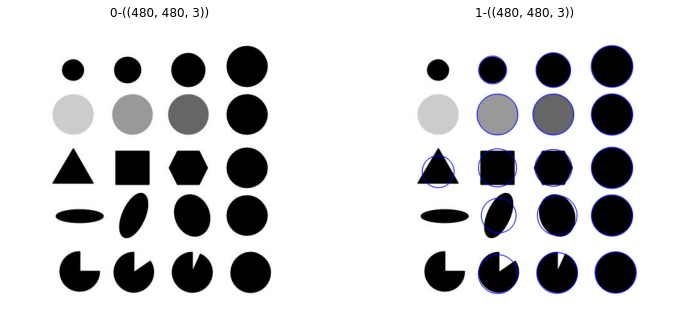

In [14]:
im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show_images([image,im_with_keypoints],imsize=6)

# 使用例子

## 使用blob找特定矩形

(964, 1292, 3)


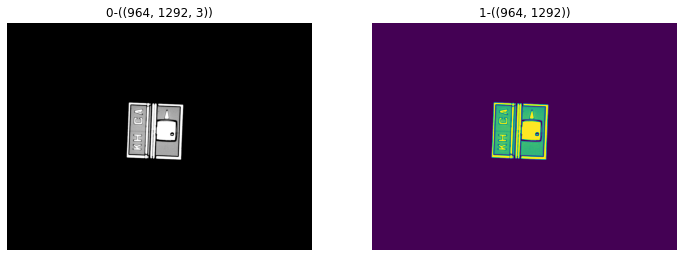

In [4]:
image_path='/home/wushaogui/ReadCode/Test/test_images/OK000.bmp'
image=cv2.imread(image_path)
print(image.shape)

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show_images([image,gray],imsize=6)

In [5]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
print(params,dir(params))

<SimpleBlobDetector_Params 0x7f283bd56e10> ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'blobColor', 'filterByArea', 'filterByCircularity', 'filterByColor', 'filterByConvexity', 'filterByInertia', 'maxArea', 'maxCircularity', 'maxConvexity', 'maxInertiaRatio', 'maxThreshold', 'minArea', 'minCircularity', 'minConvexity', 'minDistBetweenBlobs', 'minInertiaRatio', 'minRepeatability', 'minThreshold', 'thresholdStep']


In [21]:
# Change thresholds 设置灰度值阈值
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area. 设置面积阈值
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity 设置圆度
params.filterByCircularity = False
params.minCircularity = 0.7

# Filter by Convexity 设置凸性
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia 设置
params.filterByInertia = False
params.minInertiaRatio = 0.01

In [25]:
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3:
    detector = cv2.SimpleBlobDetector(params)
else:
    # Set up the detector with default parameters.
    detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs.
keypoints = detector.detect(image)
print(keypoints)

[<KeyPoint 0x7f283ba728d0>, <KeyPoint 0x7f283bbf6b10>]


In [26]:
dir(keypoints[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'angle',
 'class_id',
 'convert',
 'octave',
 'overlap',
 'pt',
 'response',
 'size']

In [29]:
for atr in dir(keypoints[0]):
    print(atr,keypoints[0].__getattribute__(atr))

__class__ <class 'cv2.KeyPoint'>
__delattr__ <method-wrapper '__delattr__' of cv2.KeyPoint object at 0x7f283ba728d0>
__dir__ <built-in method __dir__ of cv2.KeyPoint object at 0x7f283ba728d0>
__doc__ None
__eq__ <method-wrapper '__eq__' of cv2.KeyPoint object at 0x7f283ba728d0>
__format__ <built-in method __format__ of cv2.KeyPoint object at 0x7f283ba728d0>
__ge__ <method-wrapper '__ge__' of cv2.KeyPoint object at 0x7f283ba728d0>
__getattribute__ <method-wrapper '__getattribute__' of cv2.KeyPoint object at 0x7f283ba728d0>
__gt__ <method-wrapper '__gt__' of cv2.KeyPoint object at 0x7f283ba728d0>
__hash__ <method-wrapper '__hash__' of cv2.KeyPoint object at 0x7f283ba728d0>
__init__ <method-wrapper '__init__' of cv2.KeyPoint object at 0x7f283ba728d0>
__init_subclass__ <built-in method __init_subclass__ of type object at 0x7f295287cd20>
__le__ <method-wrapper '__le__' of cv2.KeyPoint object at 0x7f283ba728d0>
__lt__ <method-wrapper '__lt__' of cv2.KeyPoint object at 0x7f283ba728d0>
__ne__ 

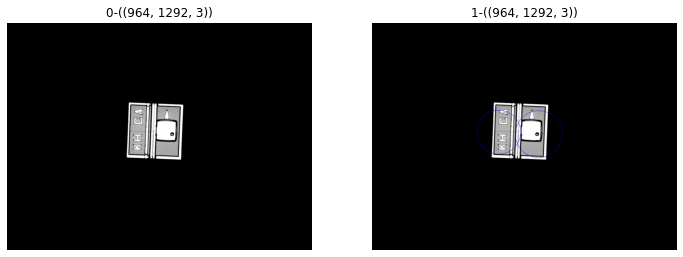

In [23]:
im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show_images([image,im_with_keypoints],imsize=6)

blob无法找到矩形？？？

## 例子2

使用blob定位特定区域

In [18]:
import cv2

params = cv2.SimpleBlobDetector_Params()

# Change thresholds 设置灰度值阈值
params.minThreshold = 180
params.maxThreshold = 254

# Filter by Area. 设置面积阈值
params.filterByArea = True
params.minArea = 0
params.minArea = 30000

# Filter by Circularity 设置圆度
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity 设置凸性
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia 设置
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3:
    detector = cv2.SimpleBlobDetector(params)
else:
    # Set up the detector with default parameters.
    detector = cv2.SimpleBlobDetector_create(params)

[] ['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


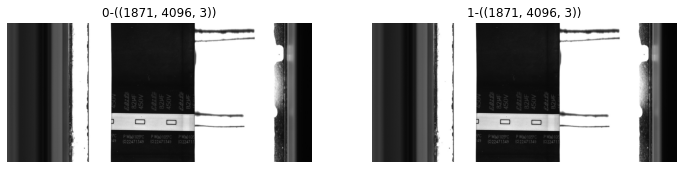

In [19]:
import numpy as np

data_path='/mnt/AIServer/研发项目/金立字符OCR检测/数据整理/CCD6/原图/2022-11-30 15-17-32-693.jpeg'
image=cv2.imread(data_path)

# Detect blobs.
keypoints = detector.detect(image)
print(keypoints,dir(keypoints))

im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show_images([image,im_with_keypoints],imsize=6)